In [29]:
import sys
import warnings
sys.path.append("../Pythonscripts")
sys.path.append(r"C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\Scripts")
import pandas as pd
import numpy as np
import synapseclient as sc
from pdkit_features import pdkit_normalize
from myutils import get_synapse_table, gait_time_series
from spectral_flatness import get_spectrum
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.simplefilter("ignore")

In [2]:
syn = sc.login()

data = get_synapse_table(syn, ["1e0888df-7059-4fab-9dd7-b0b6616442e6"], "syn7222425")

Welcome, aryton tediarjo!



INFO:synapseclient_default:Welcome, aryton tediarjo!



INFO:synapseclient_default:Downloading 0 files, 160 cached locally


In [3]:
data = data[[feat for feat in data.columns if "rest" in feat and "pathfile" in feat]]

In [27]:
def getRange(filepath, var):
    data = gait_time_series(filepath)
    data = data[(data.index.second >= 3) & (data.index.second <= 25)]
    data_range = data[var].max() - data[var].min()
    return data_range


data["accelerometer_range_x"] = data["accel_walking_rest.json.items_pathfile"].apply(getRange, var = "x")
data["userAccel_range_x"] = data["deviceMotion_walking_rest.json.items_pathfile"].apply(getRange, var = "x")
data["accelerometer_range_y"] = data["accel_walking_rest.json.items_pathfile"].apply(getRange, var = "y")
data["userAccel_range_y"] = data["deviceMotion_walking_rest.json.items_pathfile"].apply(getRange, var = "y")
data["accelerometer_range_z"] = data["accel_walking_rest.json.items_pathfile"].apply(getRange, var = "z")
data["userAccel_range_z"] = data["deviceMotion_walking_rest.json.items_pathfile"].apply(getRange, var = "z")
data["accelerometer_range_AA"] = data["accel_walking_rest.json.items_pathfile"].apply(getRange, var = "AA")
data["userAccel_range_AA"] = data["deviceMotion_walking_rest.json.items_pathfile"].apply(getRange, var = "AA")

In [28]:
data

,accel_walking_rest.json.items_pathfile,deviceMotion_walking_rest.json.items_pathfile,accelerometer_range_x,userAccel_range_x,accelerometer_range_y,userAccel_range_y,accelerometer_range_z,userAccel_range_z,accelerometer_range_AA,userAccel_range_AA
0,c:/users/atedi/.synapsecache/452/2361452/accel...,c:/users/atedi/.synapsecache/453/2361453/devic...,0.040298,0.038086,0.014282,0.013871,0.042725,0.029223,0.011523,0.024809
1,c:/users/atedi/.synapsecache/250/2352250/accel...,c:/users/atedi/.synapsecache/251/2352251/devic...,0.026840,0.027364,0.015991,0.015976,0.049301,0.040777,0.015412,0.027445
2,c:/users/atedi/.synapsecache/159/2355159/accel...,c:/users/atedi/.synapsecache/160/2355160/devic...,0.033554,0.032491,0.015686,0.015654,0.050964,0.054031,0.015775,0.044293
3,c:/users/atedi/.synapsecache/483/2419483/accel...,c:/users/atedi/.synapsecache/484/2419484/devic...,0.031784,0.022602,0.017410,0.016716,0.024582,0.015611,0.016782,0.018490
4,c:/users/atedi/.synapsecache/42/2416042/accel_...,c:/users/atedi/.synapsecache/43/2416043/device...,0.026917,0.016545,0.015091,0.011126,0.031937,0.013082,0.009435,0.009771
5,c:/users/atedi/.synapsecache/997/2411997/accel...,c:/users/atedi/.synapsecache/998/2411998/devic...,0.021759,0.016298,0.012192,0.010791,0.025558,0.013433,0.009803,0.009593
6,c:/users/atedi/.synapsecache/201/2524201/accel...,c:/users/atedi/.synapsecache/216/2524216/devic...,0.072159,0.060699,0.052505,0.063528,0.052979,0.107166,0.040742,0.108361
7,c:/users/atedi/.synapsecache/813/2576813/accel...,c:/users/atedi/.synapsecache/817/2576817/devic...,0.051697,0.053005,0.038681,0.038612,0.069962,0.038409,0.038050,0.038550
8,c:/users/atedi/.synapsecache/210/2574210/accel...,c:/users/atedi/.synapsecache/213/2574213/devic...,0.072357,0.392976,0.031601,0.035328,0.089157,0.172239,0.031161,0.413549
9,c:/users/atedi/.synapsecache/676/2573676/accel...,c:/users/atedi/.synapsecache/681/2573681/devic...,0.031464,0.020622,0.013428,0.012986,0.061066,0.019287,0.012995,0.013997


In [44]:
ts = gait_time_series('c:/users/atedi/.synapsecache/452/2361452/accel_walking_rest.json.items-7989761e-7be9-4e38-ac53-bba8913767a86616889319367240839.tmp')

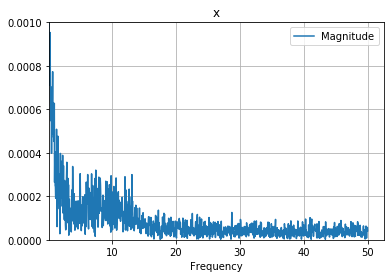

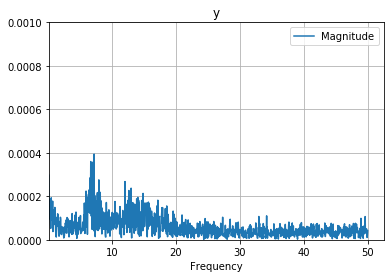

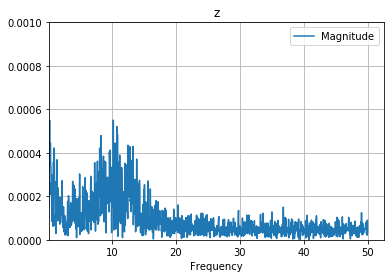

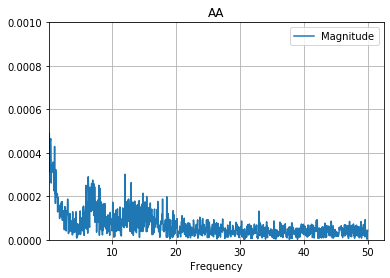

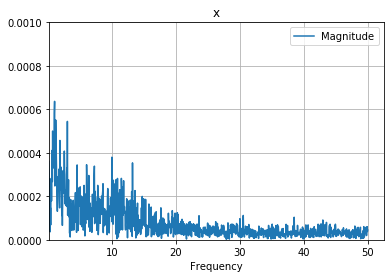

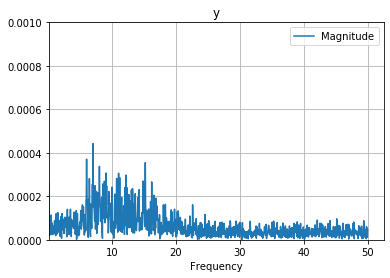

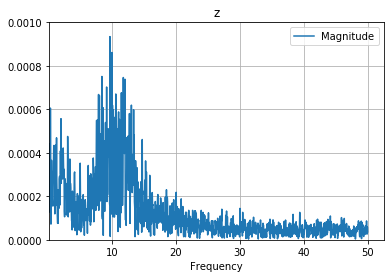

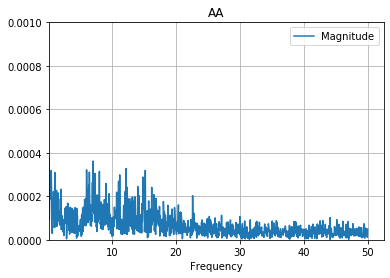

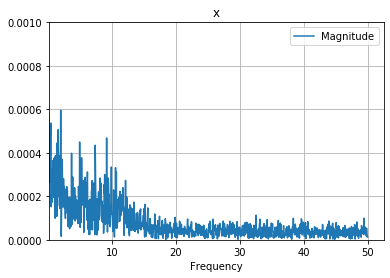

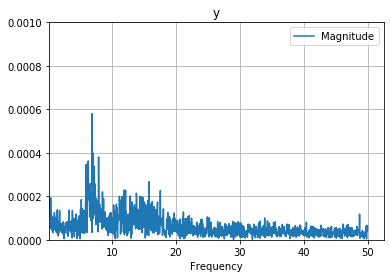

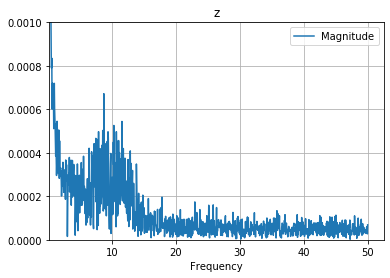

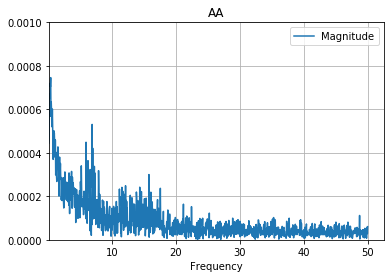

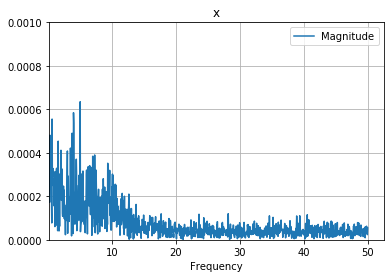

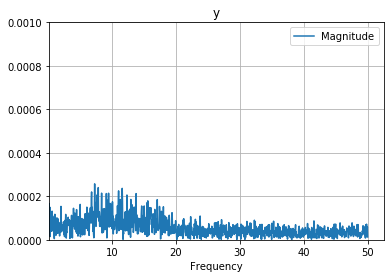

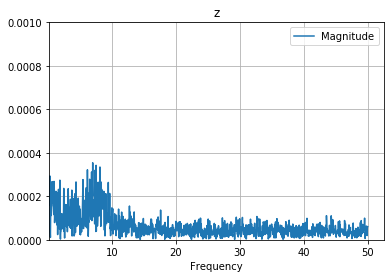

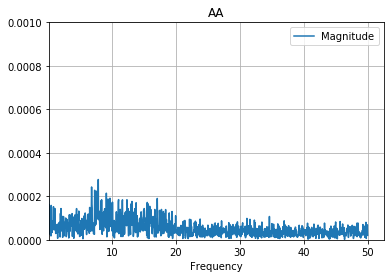

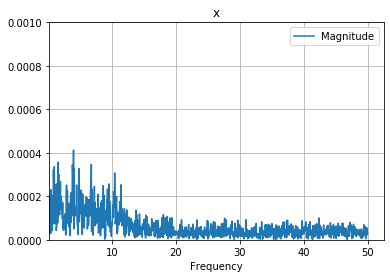

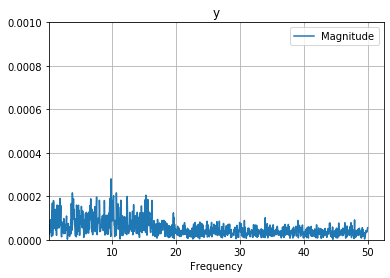

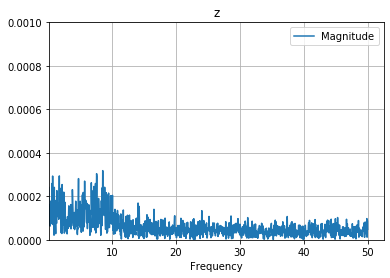

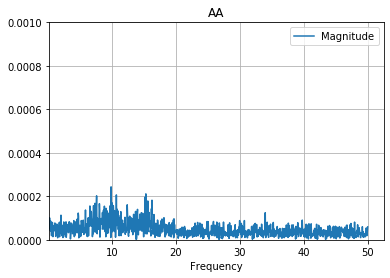

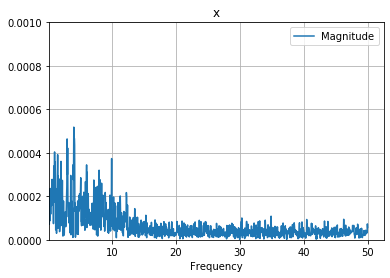

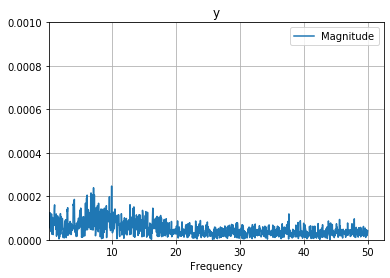

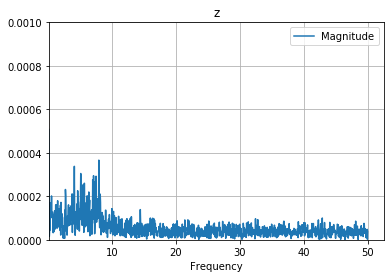

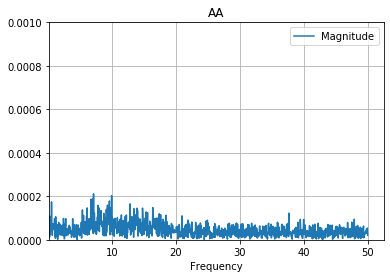

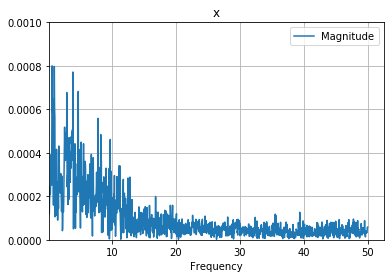

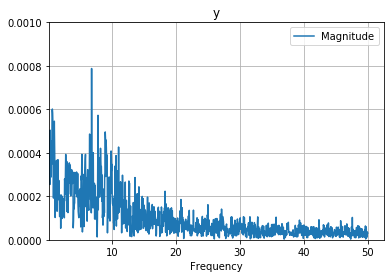

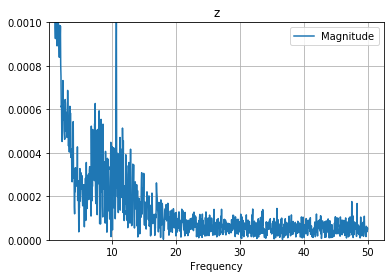

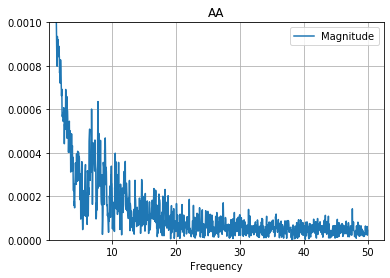

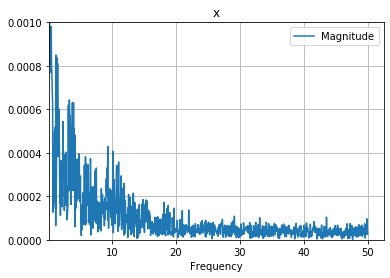

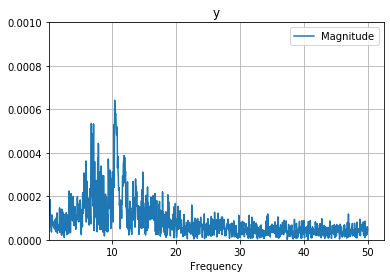

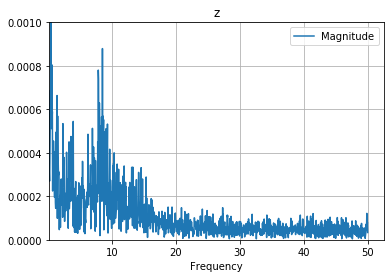

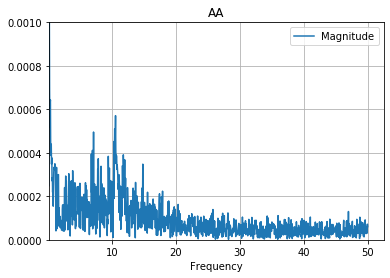

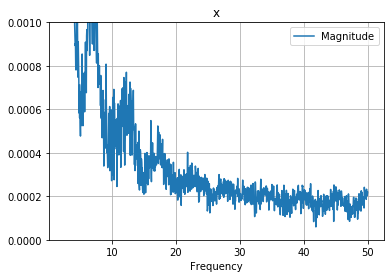

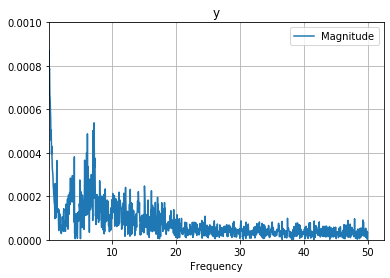

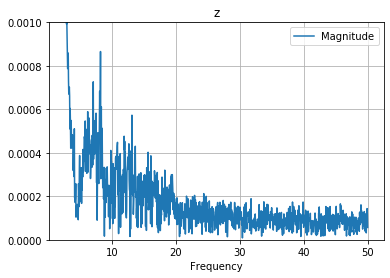

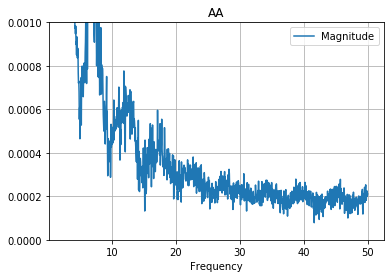

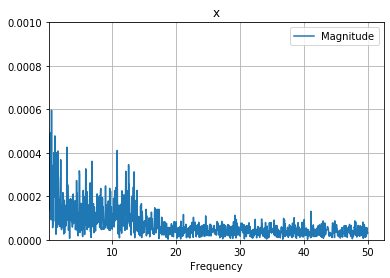

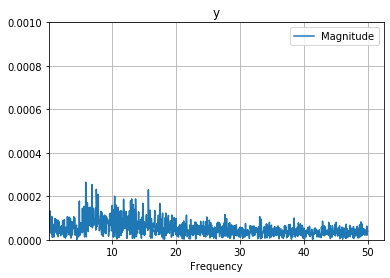

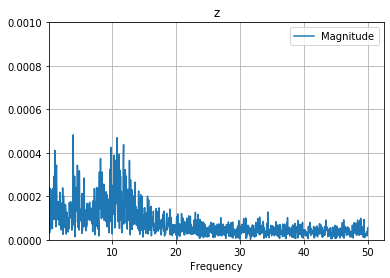

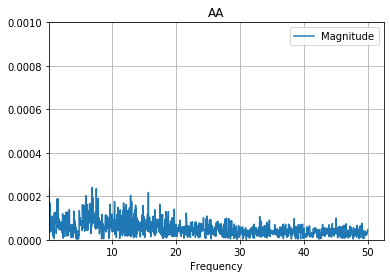

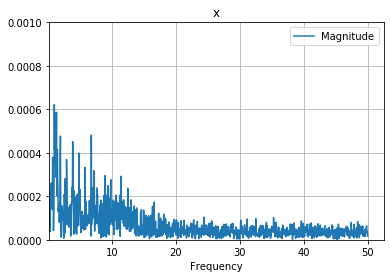

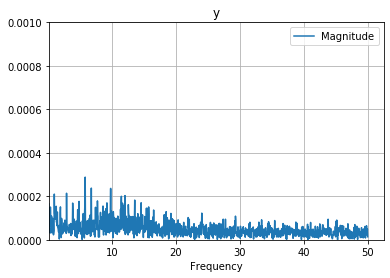

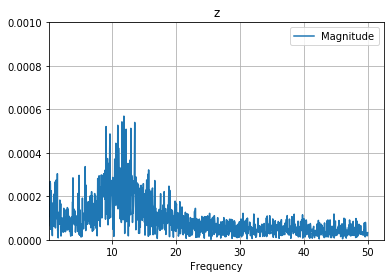

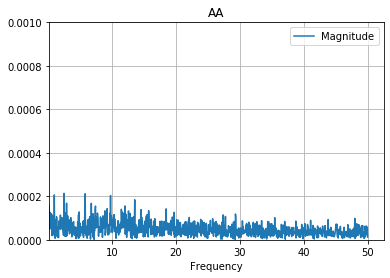

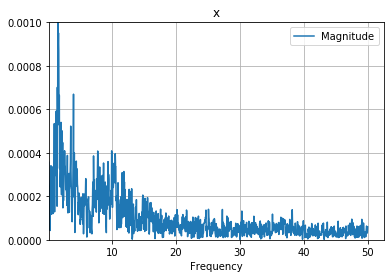

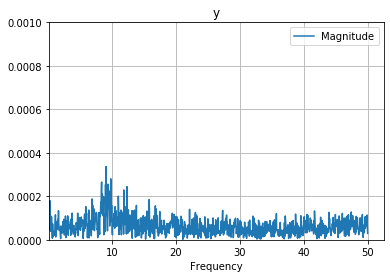

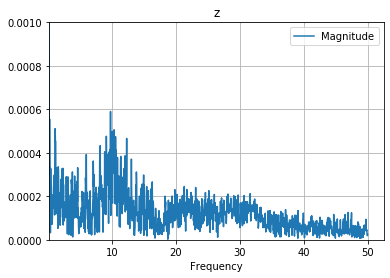

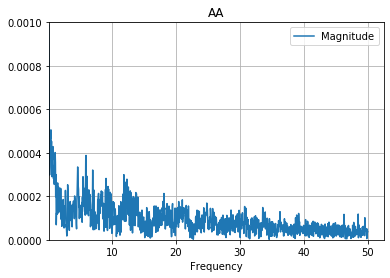

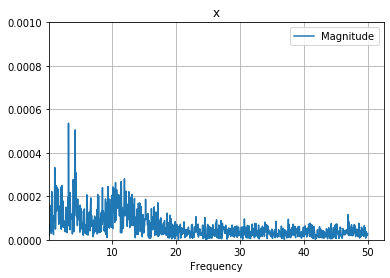

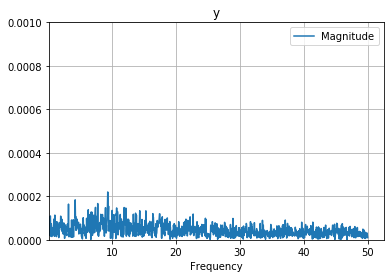

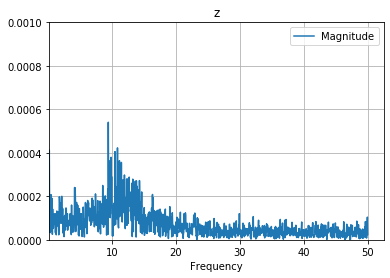

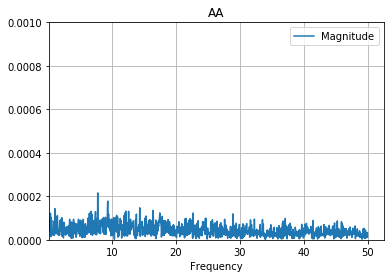

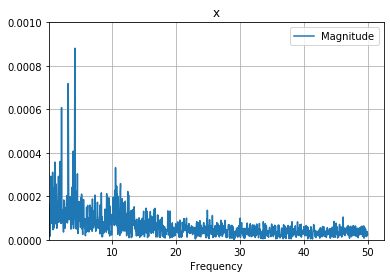

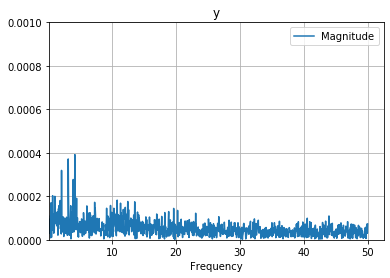

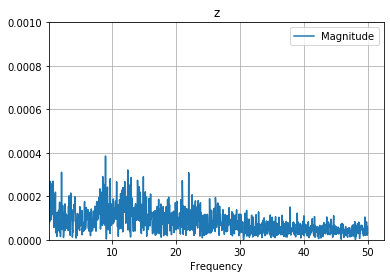

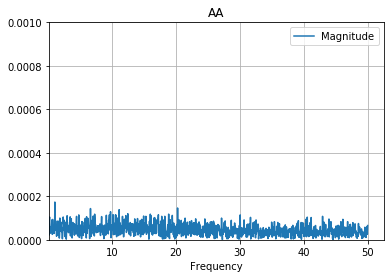

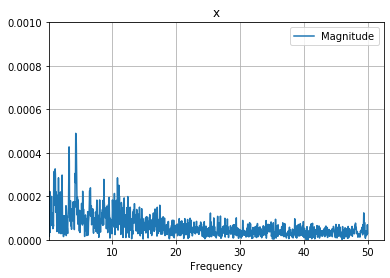

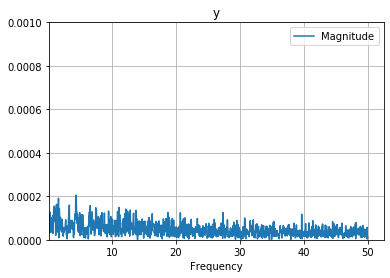

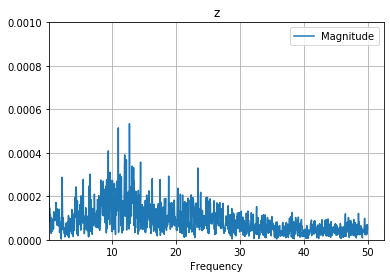

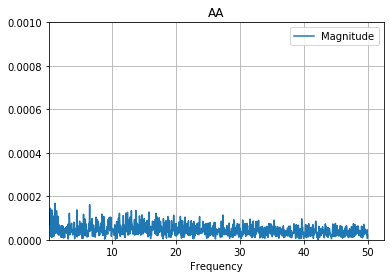

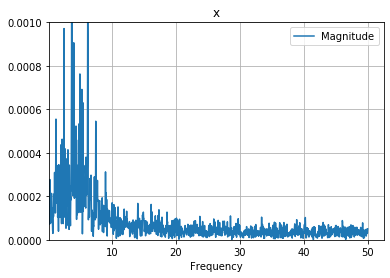

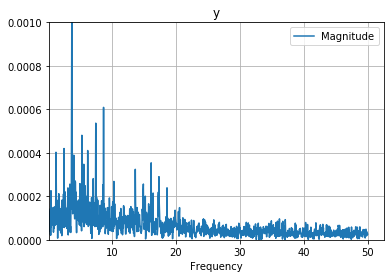

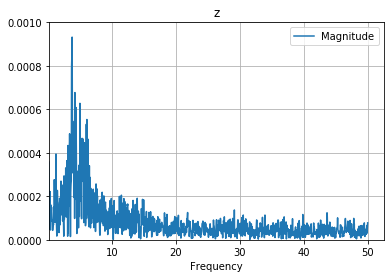

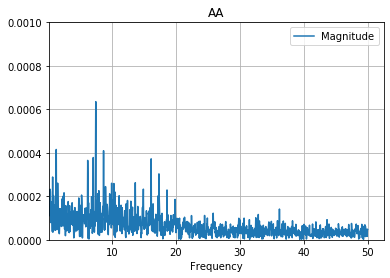

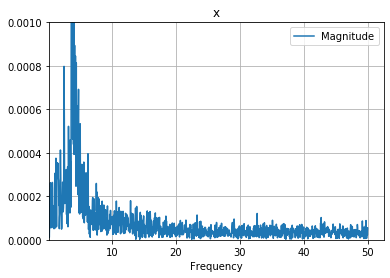

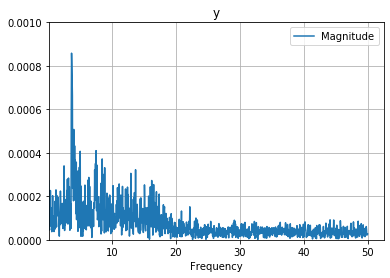

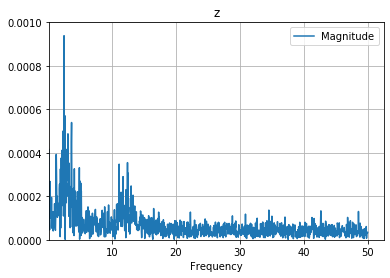

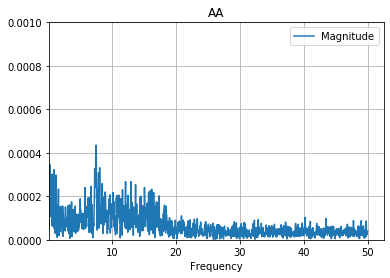

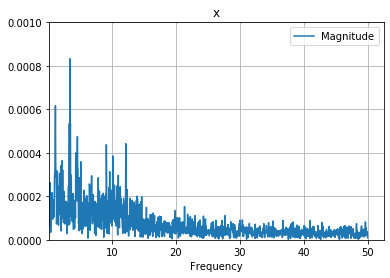

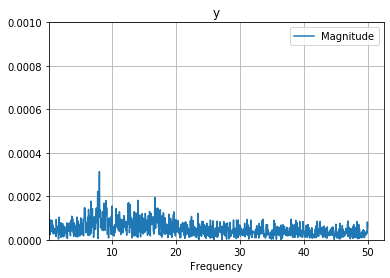

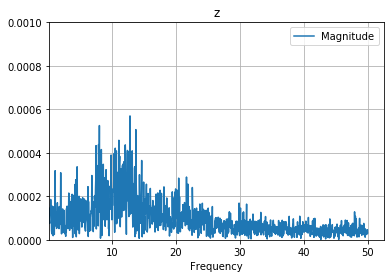

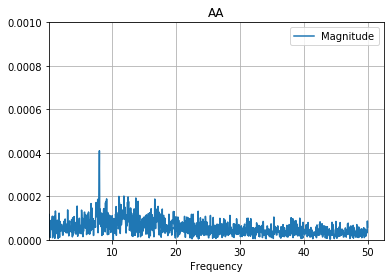

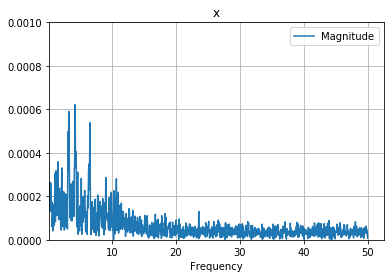

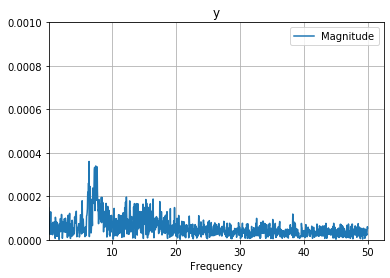

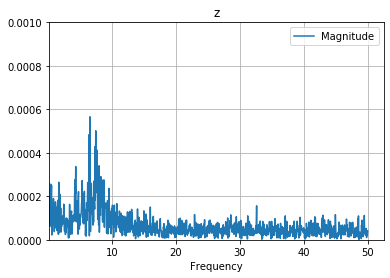

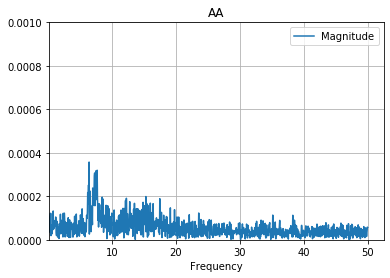

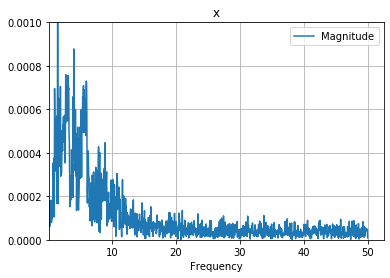

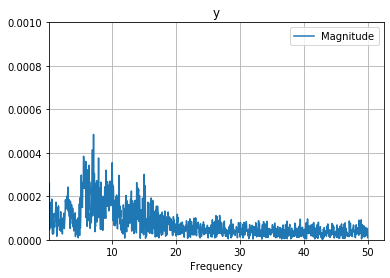

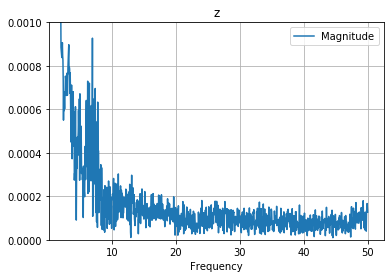

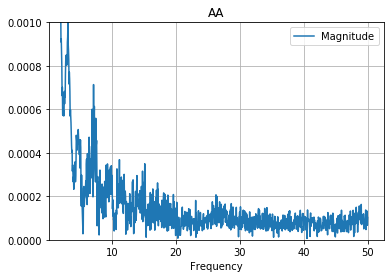

In [46]:
for path in data["deviceMotion_walking_rest.json.items_pathfile"]:
    ts = gait_time_series(path)
    ts = ts[(ts.index.second >= 3) & (ts.index.second <= 25)]
    for coord in ["x", "y", "z", "AA"]:
        spectrum = get_spectrum(ts[coord]).set_index("Frequency")
        spectrum.plot()
        plt.title(coord)
        plt.xlim(0.1)
        plt.ylim(0, 0.001)
        plt.grid()
        plt.show()